## Import the libraries

In [126]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Load the data

In [127]:
data = pd.read_csv('Hitters.csv')
df_hitters = data.copy()
df_hitters

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [128]:
# Check the data types
df_hitters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [129]:
# Check for duplicates
df_hitters.duplicated().sum()

0

In [130]:
# Categorical variables
print('The league types are:', df_hitters['League'].unique())
print('The divison types are:', df_hitters['Division'].unique())
print('The new league options are:', df_hitters['NewLeague'].unique())

The league types are: ['A' 'N']
The divison types are: ['E' 'W']
The new league options are: ['A' 'N']


In [131]:
# Encode the categorical variables
df_hitters_num = pd.get_dummies(df_hitters, columns = ['League', 'Division', 'NewLeague'], drop_first=True)
df_hitters_num

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,NaN,0,0,0
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,9,3,700.0,1,0,1
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,381,20,875.0,0,0,0
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,113,7,385.0,0,1,0
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12,960.0,0,0,0


In [132]:
# Check if there are NaN values
df_hitters.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

'Salary' column has 59 null values. We will drop them at first and then use the original dataset after the machine learning process to predict their values.

In [133]:
# Drop null values
df_hitters_num_nonull = df_hitters_num.dropna()
df_hitters_num_nonull.isnull().sum()

AtBat          0
Hits           0
HmRun          0
Runs           0
RBI            0
Walks          0
Years          0
CAtBat         0
CHits          0
CHmRun         0
CRuns          0
CRBI           0
CWalks         0
PutOuts        0
Assists        0
Errors         0
Salary         0
League_N       0
Division_W     0
NewLeague_N    0
dtype: int64

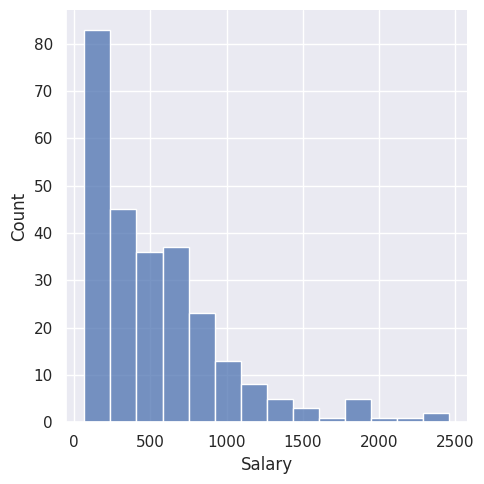

In [134]:
# Check distribution
sns.displot(df_hitters_num_nonull['Salary'])
plt.show()

In [135]:
# Check the correlation between the dependent and independent variables
correlation = df_hitters_num_nonull.corr()
correlation['Salary'].sort_values(ascending=True)

Division_W    -0.192514
League_N      -0.014282
Errors        -0.005401
NewLeague_N   -0.002834
Assists        0.025436
PutOuts        0.300480
HmRun          0.343028
AtBat          0.394771
Years          0.400657
Runs           0.419859
Hits           0.438675
Walks          0.443867
RBI            0.449457
CWalks         0.489822
CHmRun         0.524931
CAtBat         0.526135
CHits          0.548910
CRuns          0.562678
CRBI           0.566966
Salary         1.000000
Name: Salary, dtype: float64

<ipython-input-136-2106f104d560>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_hitters.corr(),


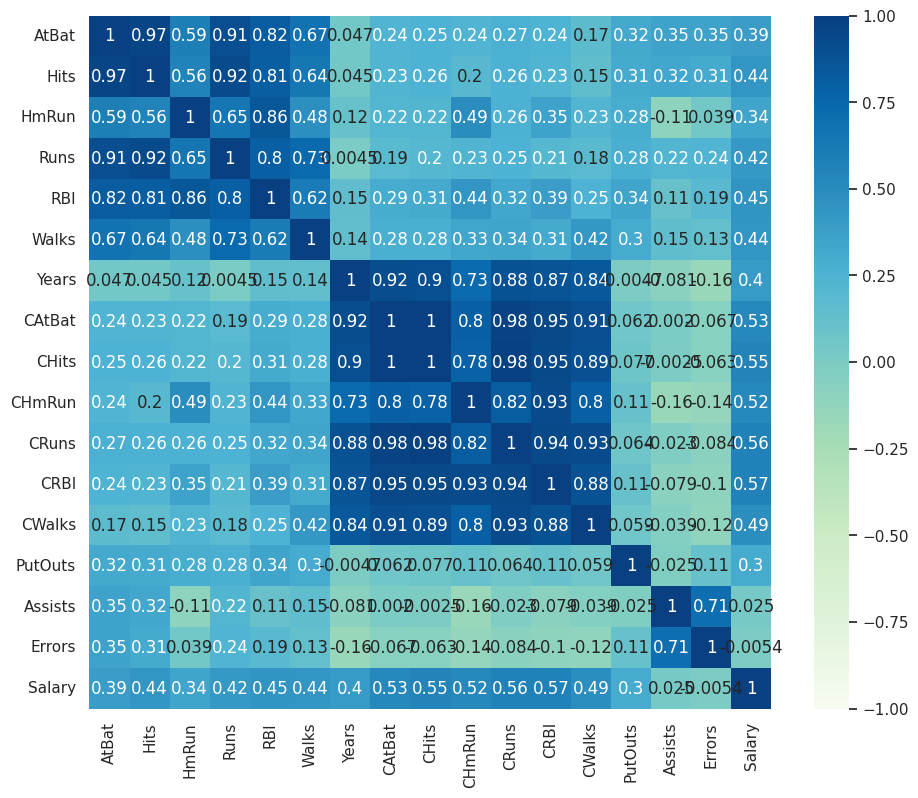

In [136]:
# Check for multicolinearity
plt.figure(figsize=(11,9))
sns.heatmap(df_hitters.corr(),
            vmin = -1,
            vmax = 1,
            cmap ="GnBu",
            annot=True)
plt.show()

In [137]:
threshold = 0.4
selected_features = correlation['Salary'][abs(correlation['Salary']) > threshold].index
# Exclude 'Salary' from the selected features
selected_features = selected_features[selected_features != 'Salary']
print(selected_features)

Index(['Hits', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun',
       'CRuns', 'CRBI', 'CWalks'],
      dtype='object')


## Declare the dependent and independent variables

In [138]:
# Split the data into independent (X) and dependent (y) variables
X = df_hitters_num_nonull[selected_features]
y = df_hitters_num_nonull['Salary']

## Split the data into training and testing parts

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

To address multicolinearity we will use Lasso for Feature Selection.

In [140]:
# Instantiate the Lasso model with a specific alpha
lasso_model = Lasso(alpha=0.01, random_state=9, max_iter=10000)

# Fit the Lasso model to the training data
lasso_model.fit(X_train, y_train)

# Get the coefficients of the features (feature importances)
lasso_coef = lasso_model.coef_

# Create a mask to select columns with non-zero coefficients
selected_columns_mask = lasso_coef > 0

# Subset the training and test features using iloc with the mask
X_train_selected = X_train.iloc[:, selected_columns_mask]
X_test_selected = X_test.iloc[:, selected_columns_mask]

# Print the selected feature names
selected_feature_names = X.columns[selected_columns_mask]
print("Selected Features:", selected_feature_names)

Selected Features: Index(['Hits', 'Walks', 'Years', 'CHits', 'CRuns', 'CRBI'], dtype='object')


In [141]:
# Standardize the training and test data
scaler = StandardScaler()
X_train_selected = scaler.fit_transform(X_train_selected)
X_test_selected = scaler.transform(X_test_selected)

## Perform linear regression

In [142]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_selected, y_train)

LinearRegression()

In [143]:
# We get the coefficient and the intercept of the linear regression
print("Linear Regression coefficients are: ",lin_reg.coef_)
print("Linear Regression y-intercept is: ",lin_reg.intercept_)

Linear Regression coefficients are:  [130.82141631  54.09287697 -55.07749016  25.12713861  62.92942332
 188.09657312]
Linear Regression y-intercept is:  543.6646238095238


In [144]:
lin_reg_y_pred = lin_reg.predict(X_test_selected)
lin_reg_y_pred

array([ 592.80555319,  642.0678755 ,  903.04218995,  373.03892465,
        554.38213186,  288.44028044,  594.85940555,  503.02466995,
        891.17444044,  831.25253776,  711.61282109, 1105.0983867 ,
        465.92453872,  456.04586268,  399.60487131,  846.88163363,
        813.55242745,  149.71002519, 1053.21228695,  443.86586602,
        469.59673145,  819.16410747,  588.42940258,  437.6749356 ,
        729.06950137,  155.60887932,  914.19763576,  281.20306218,
        357.34993257,   62.58938656,  136.11517485,  -98.89334824,
        356.31581328,  510.51044693,  201.03747704,  671.38178229,
       1382.30885019,  355.32676563,  -24.93394385,  197.61392617,
         96.98595329,  337.08641875,  614.9509702 ,  436.78318453,
       1003.5311736 ,  731.42683405,  396.91056319,  427.83810381,
        370.21827388,  728.28649733,  662.27081401,  229.0019999 ,
        759.69567628])

In [145]:
# Put the predictions in a dataframe
lin_comp = pd.DataFrame({'Predicted': lin_reg_y_pred, 'Actual': y_test})
lin_comp

,Predicted,Actual
148,592.805553,850.000
154,642.067876,277.500
318,903.042190,875.000
279,373.038925,150.000
88,554.382132,260.000
307,288.440280,277.500
221,594.859406,210.000
268,503.024670,140.000
10,891.174440,517.143
132,831.252538,325.000


In [146]:
print("Linear Regression Model RMSE is: ", math.sqrt(mean_squared_error(y_test, lin_reg_y_pred)))
print("Linear Regression Model Training Score: ",lin_reg.score(X_train_selected, y_train))
print("Linear Regression Model Testing Score: ",lin_reg.score(X_test_selected, y_test))

Linear Regression Model RMSE is:  389.9721058818014
Linear Regression Model Training Score:  0.5041956952898656
Linear Regression Model Testing Score:  0.15919416466465997


## Perform ridge regression

In [147]:
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

In [148]:
# Initializing the ridge regressor
ridge = RidgeCV(alphas=np.arange(0.1, 10, 0.1), cv=cv, scoring='neg_mean_absolute_error')

In [149]:
# Fitting the ridge regressor
ridge.fit(X_train_selected,y_train)
ridge_reg_y_pred = ridge.predict(X_test_selected)

print("Ridge tuning parameter:", (ridge.alpha_))
print ("Ridge model coefficients:", (ridge.coef_))
print ("Ridge model intercept:", (ridge.intercept_))

Ridge tuning parameter: 9.9
Ridge model coefficients: [125.90461257  61.17874086 -31.65113805  50.34716504  59.37918739
 139.60990442]
Ridge model intercept: 543.6646238095238


In [150]:
print("Ridge Regression Model RMSE is: ", math.sqrt(mean_squared_error(y_test, ridge_reg_y_pred)))
print("Ridge Regression Model Training Score: ",ridge.score(X_train_selected, y_train))
print("Ridge Regression Model Testing Score: ",ridge.score(X_test_selected, y_test))

Ridge Regression Model RMSE is:  389.43475864177606
Ridge Regression Model Training Score:  0.5026910374262492
Ridge Regression Model Testing Score:  0.16150968115751663


## Perform lasso regression

In [151]:
# Initializing the lasso regressor
lasso = LassoCV(alphas=np.arange(0.1, 10.0, 0.1), cv=cv, tol = 1)

In [152]:
# Fitting the lasso regressor
lasso.fit(X_train_selected, y_train)
lasso_reg_y_pred = lasso.predict(X_test_selected)

print("Lasso tuning parameter:", (lasso.alpha_))
print ("Lasso model coefficients:", (lasso.coef_))
print ("Lassso model intercept:", (lasso.intercept_))

Lasso tuning parameter: 9.2
Lasso model coefficients: [159.38864687  74.25814214 139.16523699  53.14271949   7.6867278
  22.13561532]
Lassso model intercept: 543.6646238095238


In [153]:
print("Lasso Regression Model RMSE is: ", math.sqrt(mean_squared_error(y_test, lasso_reg_y_pred)))
print("Lasso Regression Model Training Score: ",lasso.score(X_train_selected, y_train))
print("Lasso Regression Model Testing Score: ",lasso.score(X_test_selected, y_test))

Lasso Regression Model RMSE is:  418.66166208279225
Lasso Regression Model Training Score:  0.4683722317390858
Lasso Regression Model Testing Score:  0.0309302965248891


## Compare the score

In [154]:
print("Linear Regression Model Training Score: ",lin_reg.score(X_train_selected, y_train))
print("Linear Regression Model Testing Score: ",lin_reg.score(X_test_selected, y_test))
print("\nRidge Regression Model Training Score: ",ridge.score(X_train_selected, y_train))
print("Ridge Regression Model Testing Score: ",ridge.score(X_test_selected, y_test))
print("\nLasso Regression Model Training Score: ",lasso.score(X_train_selected, y_train))
print("Lasso Regression Model Testing Score: ",lasso.score(X_test_selected, y_test))

Linear Regression Model Training Score:  0.5041956952898656
Linear Regression Model Testing Score:  0.15919416466465997

Ridge Regression Model Training Score:  0.5026910374262492
Ridge Regression Model Testing Score:  0.16150968115751663

Lasso Regression Model Training Score:  0.4683722317390858
Lasso Regression Model Testing Score:  0.0309302965248891


## Root mean squared error

In [155]:
print("Linear Regression Model RMSE is: ", math.sqrt(mean_squared_error(y_test, lin_reg_y_pred)))
print("Ridge Regression Model RMSE is: ", math.sqrt(mean_squared_error(y_test, ridge_reg_y_pred)))
print("Lasso Regression Model RMSE is: ", math.sqrt(mean_squared_error(y_test, lasso_reg_y_pred)))

Linear Regression Model RMSE is:  389.9721058818014
Ridge Regression Model RMSE is:  389.43475864177606
Lasso Regression Model RMSE is:  418.66166208279225


## Replacing the missing values in the DataFrame

In [156]:
df_hitters_nan = df_hitters_num[df_hitters_num['Salary'].isnull()]
df_hitters_nan.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,NaN,0,0,0
15,183,39,3,20,15,11,3,201,42,3,20,16,11,118,0,0,NaN,0,1,0
18,407,104,6,57,43,65,12,5233,1478,100,643,658,653,912,88,9,NaN,0,1,0
22,22,10,1,4,2,1,6,84,26,2,9,9,3,812,84,11,NaN,0,1,0
30,313,84,9,42,30,39,17,6890,1833,224,1033,864,1087,127,221,7,NaN,0,1,0


In [157]:
# Select the features for prediction
X_predict = df_hitters_nan[selected_feature_names]

# Standardize the data using the same scaler
X_predict = scaler.transform(X_predict)

# Use the best model (Linear Regression) to predict missing 'Salary' values
predicted_salary = lin_reg.predict(X_predict)

# Assign the predicted values to the 'Salary' column in the DataFrame
df_hitters_nan.loc[:, 'Salary'] = predicted_salary

<ipython-input-157-309e714b7506>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hitters_nan.loc[:, 'Salary'] = predicted_salary


In [158]:
# Concatenate the DataFrame with predicted 'Salary' values with the original data
df_hitters_filled = pd.concat([df_hitters_num_nonull, df_hitters_nan])

# Check if all NaN values in the 'Salary' column are filled
print("Number of NaN values in 'Salary' column:", df_hitters_filled['Salary'].isnull().sum())

Number of NaN values in 'Salary' column: 0


In [159]:
df_hitters_filled

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.000000,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.000000,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.000000,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.500000,1,0,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.000000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,289,63,7,36,41,44,17,7402,1954,195,1115,919,1153,166,211,7,821.254207,0,1,0
298,181,46,1,19,18,17,5,937,238,9,88,95,104,37,98,9,118.029956,0,0,0
302,200,51,2,14,29,25,23,9778,2732,379,1272,1652,925,398,29,7,1141.556524,1,1,1
305,580,194,9,91,62,78,8,3372,1028,48,604,314,469,270,13,6,931.459220,1,0,1
